In [2]:
# Make the output of plotting commands be displayed inline within the notebook,
%matplotlib inline 
#from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit
import numpy as np
import matplotlib.pyplot as plt
import pygrib # import pygrib interface to grib_api

plt.rcParams['figure.figsize']=(20,10)
%config InlineBackend.figure_format="jpeg"

In [60]:
!wget "www.ftp.ncep.noaa.gov/data/nccf/com/gfs/prod/gfs.2017010106/gfs.t06z.pgrb2.0p50.f006"

--2017-01-01 13:06:25--  http://www.ftp.ncep.noaa.gov/data/nccf/com/gfs/prod/gfs.2017010106/gfs.t06z.pgrb2.0p50.f006
Auflösen des Hostnamen »www.ftp.ncep.noaa.gov (www.ftp.ncep.noaa.gov)«... 140.90.101.61
Verbindungsaufbau zu www.ftp.ncep.noaa.gov (www.ftp.ncep.noaa.gov)|140.90.101.61|:80... verbunden.
HTTP-Anforderung gesendet, warte auf Antwort... 200 OK
Länge: 71493716 (68M) [text/plain]
In »»gfs.t06z.pgrb2.0p50.f006«« speichern.

100%[======================================>] 71.493.716  1,39MB/s   in 35s    

2017-01-01 13:07:00 (1,95 MB/s) - »»gfs.t06z.pgrb2.0p50.f006«« gespeichert [71493716/71493716]



## PYGRIB

In [3]:
grbs = pygrib.open('gfs.t06z.pgrb2.0p50.f006')

In [4]:
grbs

In [5]:
for grb in grbs[:15]:
    print grb

1:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 6 hrs:from 201701010600
2:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 6 hrs:from 201701010600
3:224:224 (instant):regular_ll:unknown:level 0 220:fcst time 6 hrs:from 201701010600
4:Wind speed (gust):m s**-1 (instant):regular_ll:surface:level 0:fcst time 6 hrs:from 201701010600
5:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 6 hrs:from 201701010600
6:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 6 hrs:from 201701010600
7:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 6 hrs:from 201701010600
8:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 6 hrs:from 201701010600
9:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 6 hrs:from 201701010600
10:Ozone mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level

In [10]:
i=0
for grb in grbs[:]:
    if grb.parameterName == 'Temperature' :
        print i,grb.level,grb
        i=i+1
        if i>5:
            break

0 1 6:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 6 hrs:from 201701010600
1 2 12:Temperature:K (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 6 hrs:from 201701010600
2 3 18:Temperature:K (instant):regular_ll:isobaricInhPa:level 300 Pa:fcst time 6 hrs:from 201701010600
3 5 24:Temperature:K (instant):regular_ll:isobaricInhPa:level 500 Pa:fcst time 6 hrs:from 201701010600
4 7 30:Temperature:K (instant):regular_ll:isobaricInhPa:level 700 Pa:fcst time 6 hrs:from 201701010600
5 10 36:Temperature:K (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 6 hrs:from 201701010600


In [8]:
#print grb.keys()

In [11]:
grbs.rewind() # rewind the iterator
from datetime import datetime
date_valid = datetime(2017,1,10,6)
t2mens = []
grb_n=[]
for grb in grbs:
    if grb.parameterName == 'Temperature' : 
        t2mens.append(grb.values)
        grb_n.append(str(grb))
t2mens = np.array(t2mens)
print t2mens.shape, t2mens.min(), t2mens.max()
lats, lons = grb.latlons()  # get the lats and lons for the grid.
print 'min/max lat and lon',lats.min(), lats.max(), lons.min(), lons.max()

(47, 361, 720) 183.0 9.96921e+36
min/max lat and lon -90.0 90.0 0.0 359.5


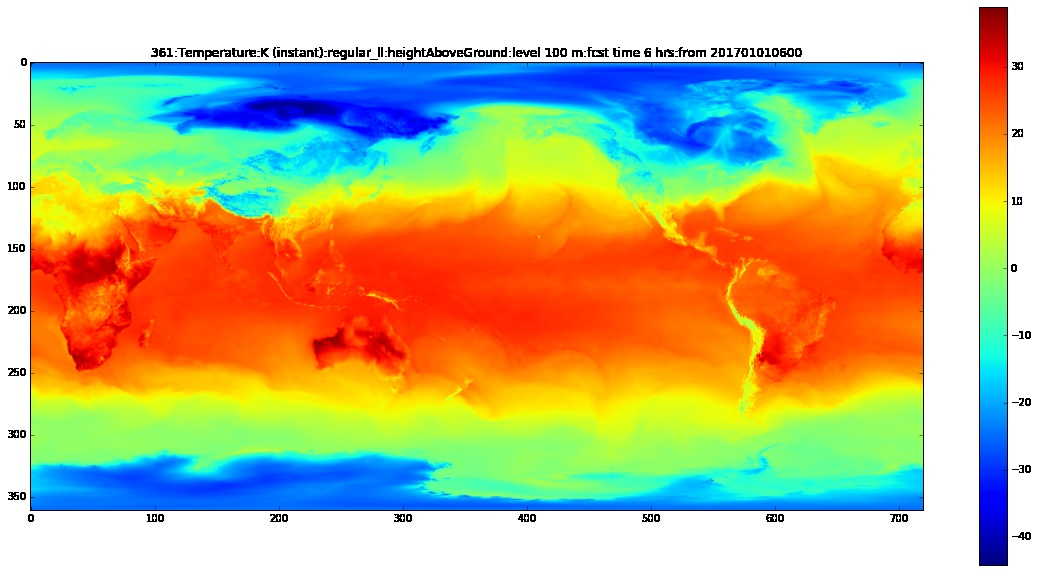

In [12]:
nr=39
plt.imshow(t2mens[nr,:,:]-273.15)
plt.title(grb_n[nr])
plt.colorbar();

In [13]:
#plt.plot(t2mens.mean(axis=1).mean(axis=1)-273.15)
#plt.ylim(-100,100)

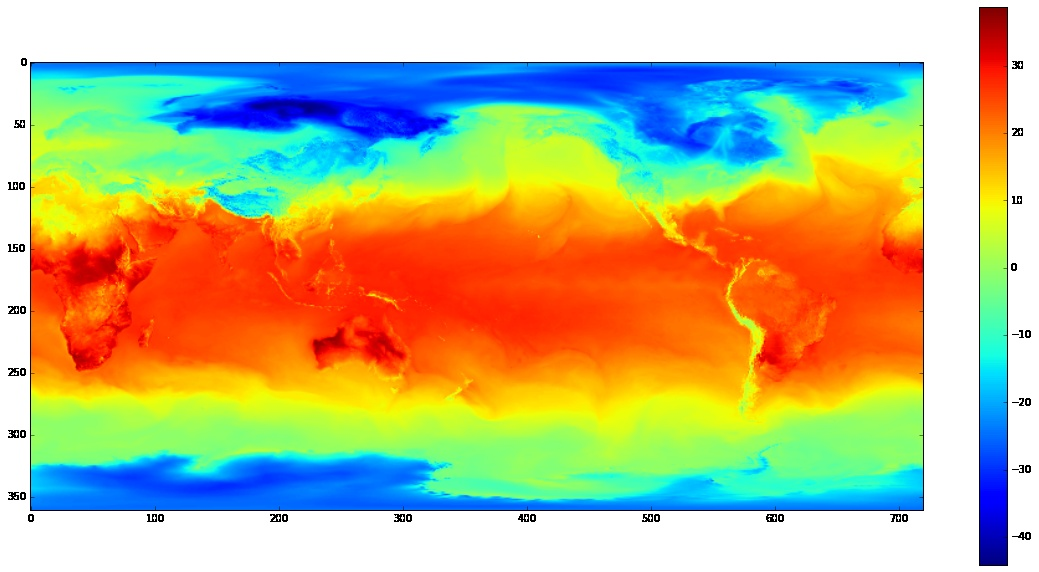

In [14]:
plt.imshow(t2mens[43,:,:]-273.15)  #Kelvin to Celsius
plt.colorbar();

In [15]:
i=0
for grb in grbs[:]:
    if "wind" in grb.parameterName :
        print i,grb
        i=i+1
        if i>5:
            break

0 1:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 6 hrs:from 201701010600
1 2:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 6 hrs:from 201701010600
2 8:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 6 hrs:from 201701010600
3 9:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 6 hrs:from 201701010600
4 14:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 6 hrs:from 201701010600
5 15:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 6 hrs:from 201701010600


In [16]:
grbs.rewind() # rewind the iterator
from datetime import datetime
date_valid = datetime(2017,1,10,6)
t2mens = []
grb_n=[]
for grb in grbs:
    if "wind" in grb.parameterName : 
        t2mens.append(grb.values)
        grb_n.append(str(grb))
t2mens = np.array(t2mens)
print t2mens.shape, t2mens.min(), t2mens.max()
lats, lons = grb.latlons()  # get the lats and lons for the grid.
print 'min/max lat and lon',lats.min(), lats.max(), lons.min(), lons.max()

(88, 361, 720) -85.0 9.96921e+36
min/max lat and lon -90.0 90.0 0.0 359.5


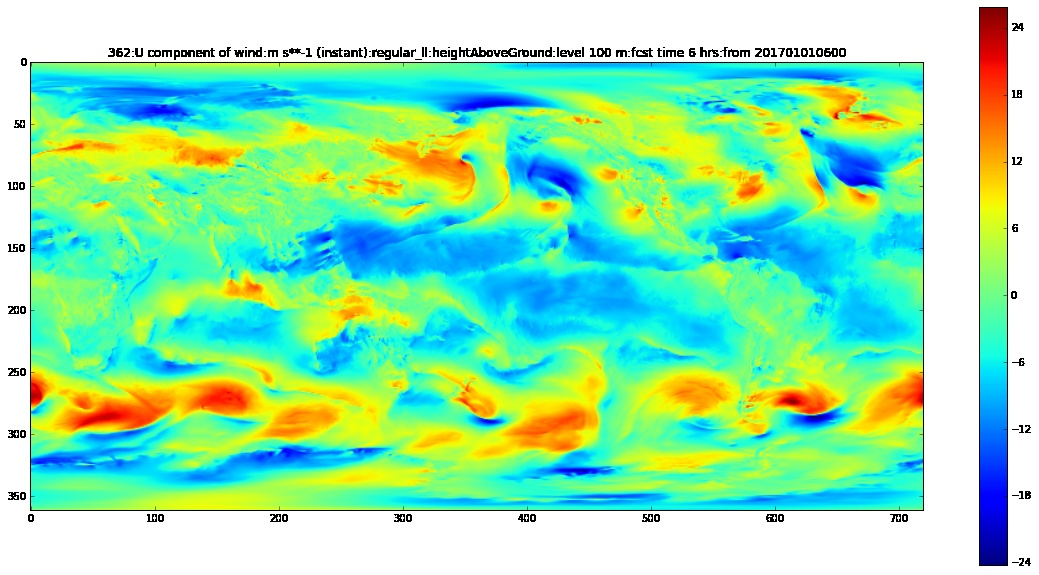

In [17]:
nr=72
plt.imshow(t2mens[nr,:,:])
plt.title(grb_n[nr])
plt.colorbar();

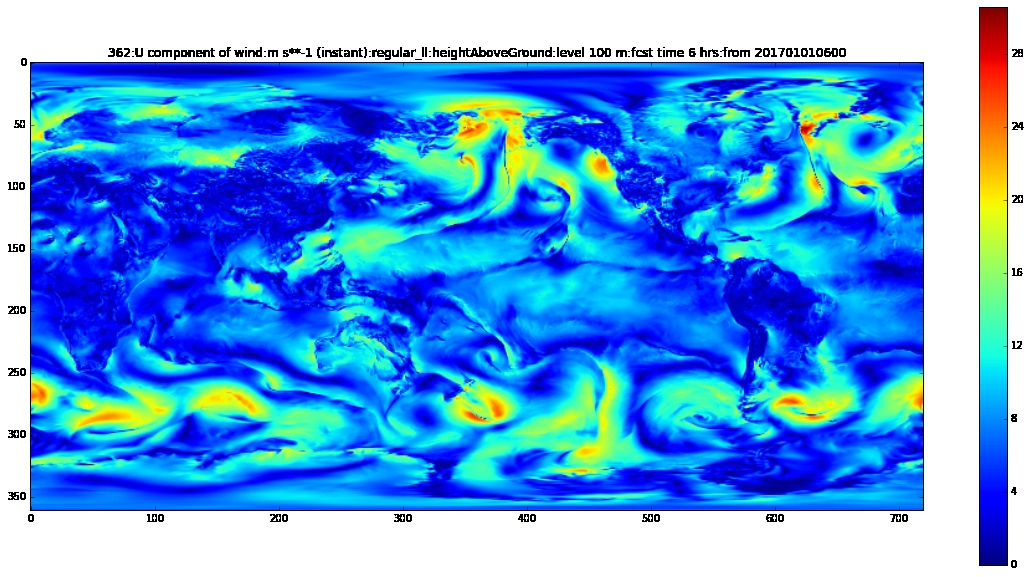

In [18]:
nr=72
plt.imshow(np.sqrt(t2mens[nr,:,:]**2+t2mens[nr+1,:,:]**2))
plt.title(grb_n[nr])
plt.colorbar();

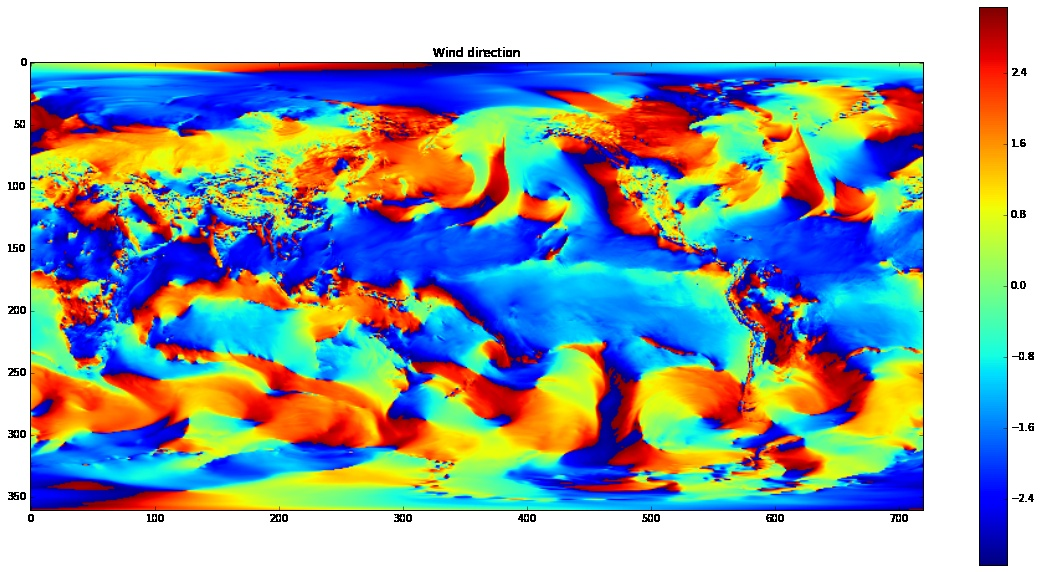

In [20]:
nr=72
plt.imshow(np.arctan2(t2mens[nr,:,:],t2mens[nr+1,:,:]))
plt.title("Wind direction")
plt.colorbar();

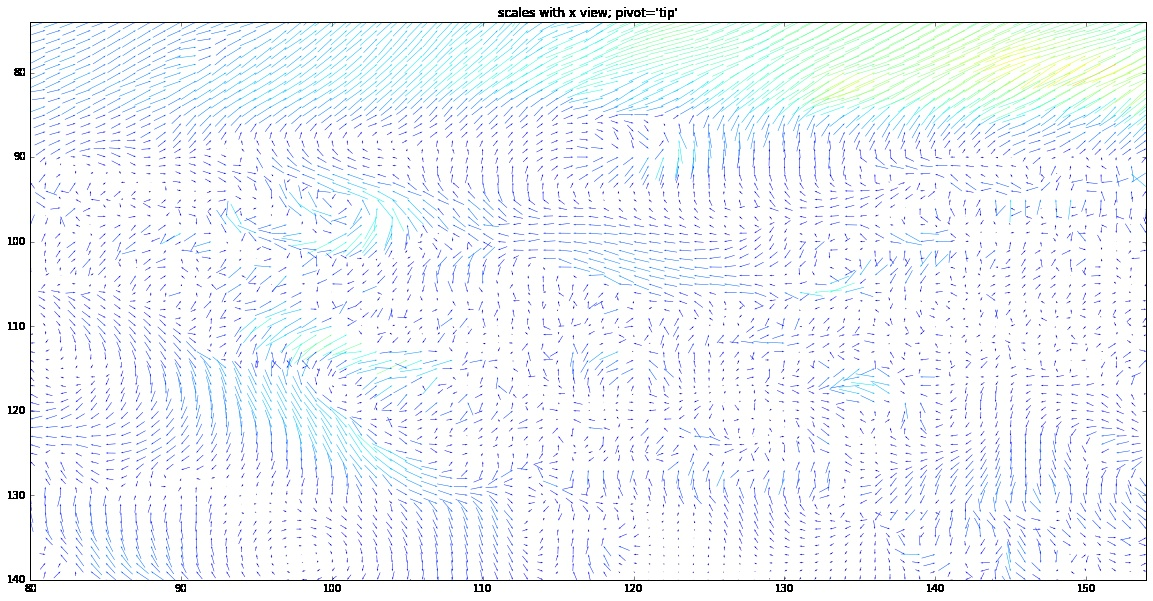

In [21]:
plt.figure()

X, Y = np.meshgrid(np.arange(0, t2mens[nr,:,:].shape[1]), np.arange(0, t2mens[nr,:,:].shape[0]))
M = np.hypot(t2mens[nr,:,:],t2mens[nr+1,:,:])
U = t2mens[nr,:,:]
V = t2mens[nr+1,:,:]
Q = plt.quiver(X, Y, U, V, M,
               units='x',
               pivot='tip',
               width=0.032,
               scale=1 / 0.15)
qk = plt.quiverkey(Q, 0.9, 1.05, 1, r'$1 \frac{m}{s}$',
                   labelpos='E',
                   fontproperties={'weight': 'bold'})
#plt.plot(X, Y, 'k.')
plt.axis([2*(90-50), 2*(90-13), 2*(90-20), 2*(90-53)])
plt.title("scales with x view; pivot='tip'");

In [22]:
t2mens[nr,:,:].shape[0]

361

In [23]:
grb.name

u'5-wave geopotential height'

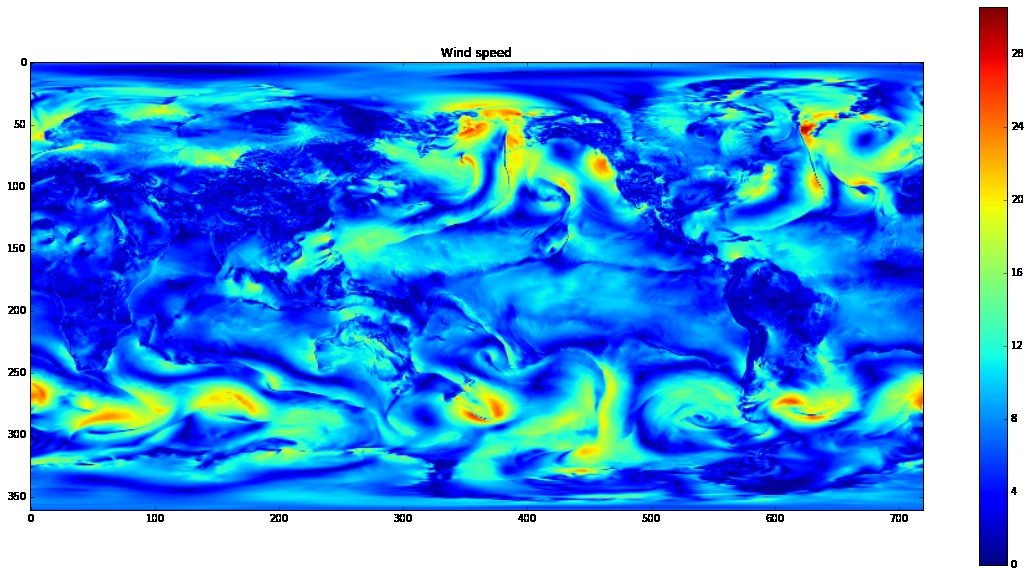

In [24]:
nr=72
plt.imshow(np.sqrt(t2mens[nr,:,:]**2+t2mens[nr+1,:,:]**2))
plt.title("Wind speed")
plt.colorbar();

In [25]:
print grb
print grb.editionNumber
print grb.totalLength
print grb.sectionNumber
print grb.section1Length
print grb.numberOfSection
print grb.centre
print grb.standardDeviation

415:5-wave geopotential height:gpm (instant):regular_ll:isobaricInhPa:level 50000 Pa:fcst time 6 hrs:from 201701010600
2
91301
[1 3 3 4 5 6 7]
21
[1 3 4 5 6 7]
kwbc
335.383434565


In [26]:
import mpl_toolkits

In [27]:
lon=np.linspace(0,359.5,720)
lon[lon>180]=lon[lon>180]-360

import pandas as pd

In [28]:
df=pd.DataFrame(t2mens[nr,:,:],columns=lon,index=np.linspace(90,-90,361))

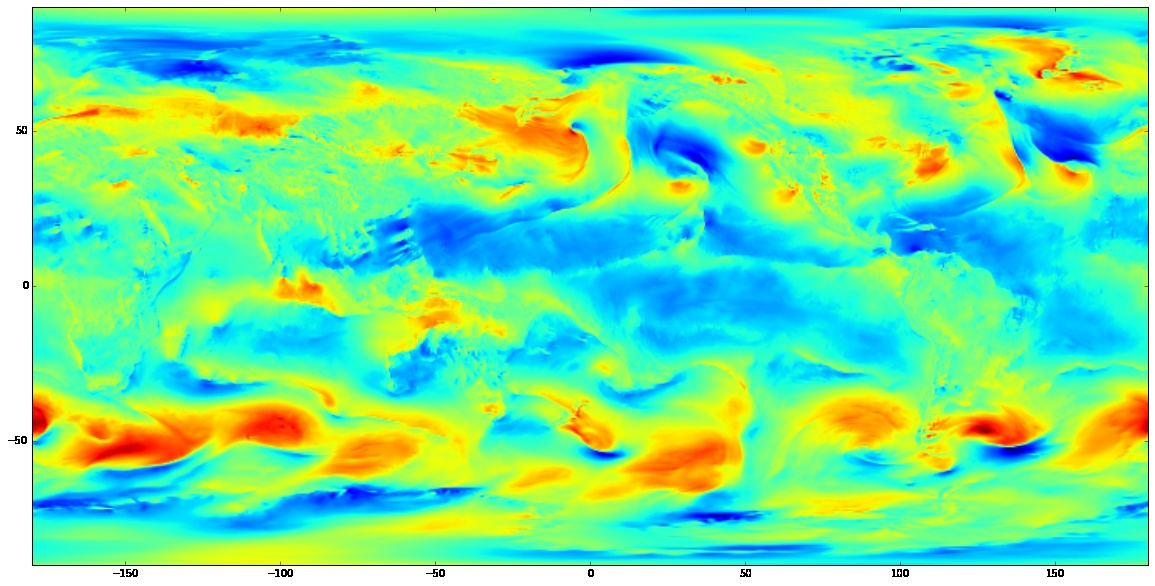

In [29]:
fig = plt.figure()
lon=df.columns[::40]
#plt.xticks(range(len(lon)), lon, size='small')
#plt.set_xticklabels(columns)

#ax1 = fig.add_subplot(131,xticks=xlabels, xticklabels=df.columns, yticklabels=df.index)
plt.imshow(df,extent=[-180,180,-90,90]);

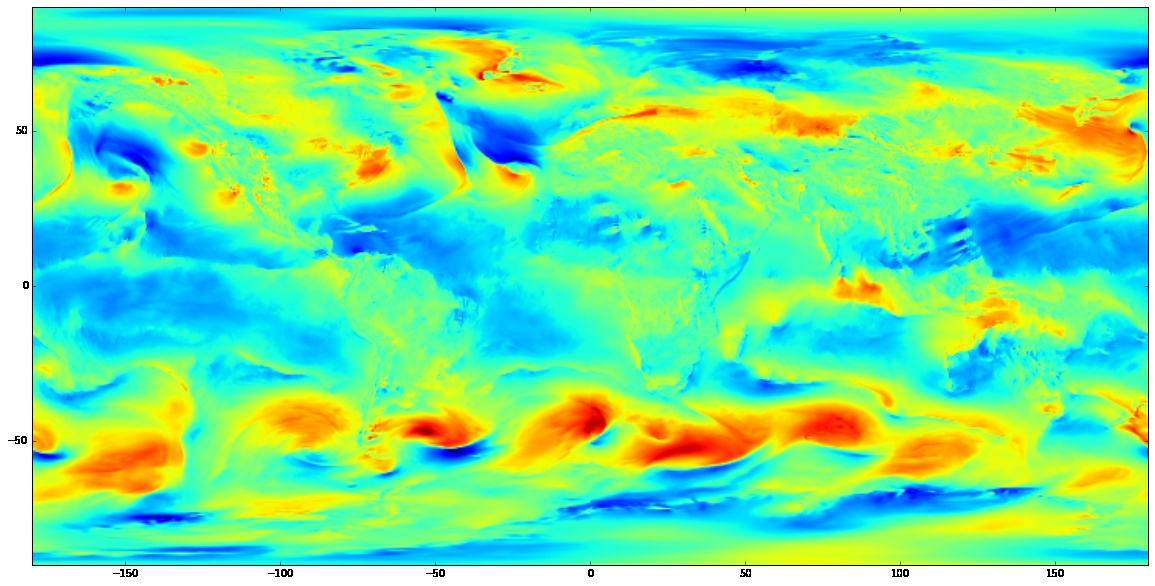

In [31]:
plt.imshow(np.roll(df.values,360),extent=[-180,180,-90,90]);

In [32]:
df.head()

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5
90.0,3.00,3.07,3.14,3.21,3.27,3.34,3.41,3.48,3.54,3.61,...,2.31,2.38,2.45,2.52,2.59,2.66,2.73,2.80,2.86,2.93
89.5,2.07,2.13,2.18,2.24,2.30,2.36,2.42,2.48,2.54,2.60,...,1.46,1.52,1.58,1.64,1.70,1.76,1.82,1.88,1.95,2.01
89.0,0.93,0.99,1.04,1.09,1.14,1.20,1.25,1.30,1.35,1.40,...,0.39,0.45,0.50,0.56,0.61,0.67,0.72,0.77,0.83,0.88
88.5,-0.15,-0.09,-0.04,0.01,0.07,0.12,0.18,0.23,0.28,0.33,...,-0.69,-0.63,-0.58,-0.53,-0.47,-0.42,-0.37,-0.31,-0.26,-0.20
88.0,-0.94,-0.88,-0.82,-0.76,-0.71,-0.65,-0.59,-0.54,-0.48,-0.43,...,-1.51,-1.46,-1.40,-1.34,-1.28,-1.22,-1.17,-1.11,-1.05,-0.99


In [33]:
grbs.rewind() # rewind the iterator
from datetime import datetime
date_valid = datetime(2017,1,10,6)
t2mens = []
grb_n=[]
for grb in grbs:
    if grb.level== 0: #grb.parameterName == 'Wind speed (gust)' : 
        t2mens.append(grb.values)
        grb_n.append(str(grb))
t2mens = np.array(t2mens)
#print t2mens.shape, t2mens.min(), t2mens.max()
lats, lons = grb.latlons()  # get the lats and lons for the grid.
print 'min/max lat and lon',lats.min(), lats.max(), lons.min(), lons.max()

min/max lat and lon -90.0 90.0 0.0 359.5


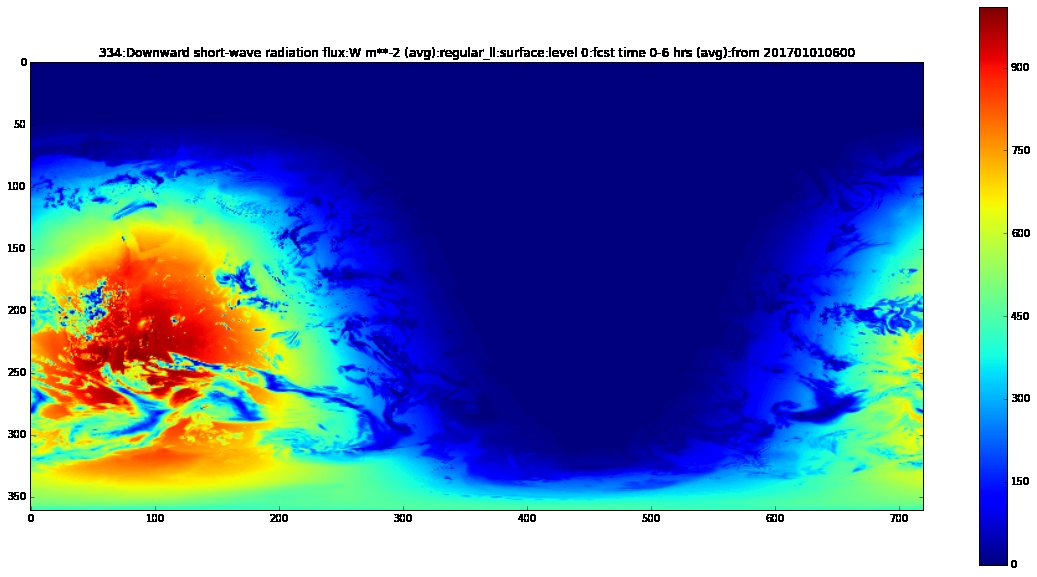

In [34]:
nr=63
plt.imshow(t2mens[nr,:,:])
plt.title(grb_n[nr])
plt.colorbar();

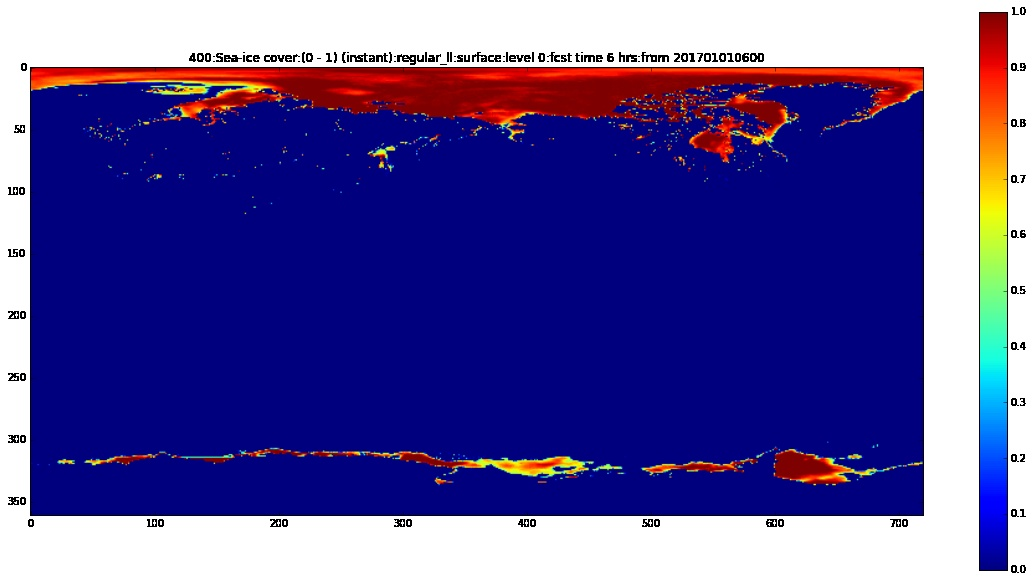

In [35]:
nr=92
plt.imshow(t2mens[nr,:,:])
plt.title(grb_n[nr])
plt.colorbar();

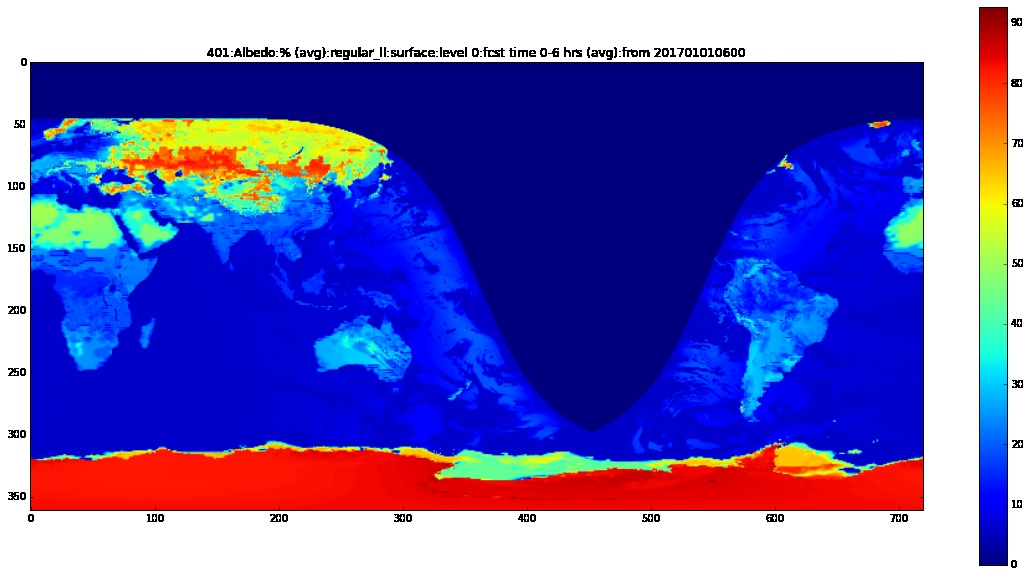

In [36]:
nr=93
plt.imshow(t2mens[nr,:,:])
plt.title(grb_n[nr])
plt.colorbar();

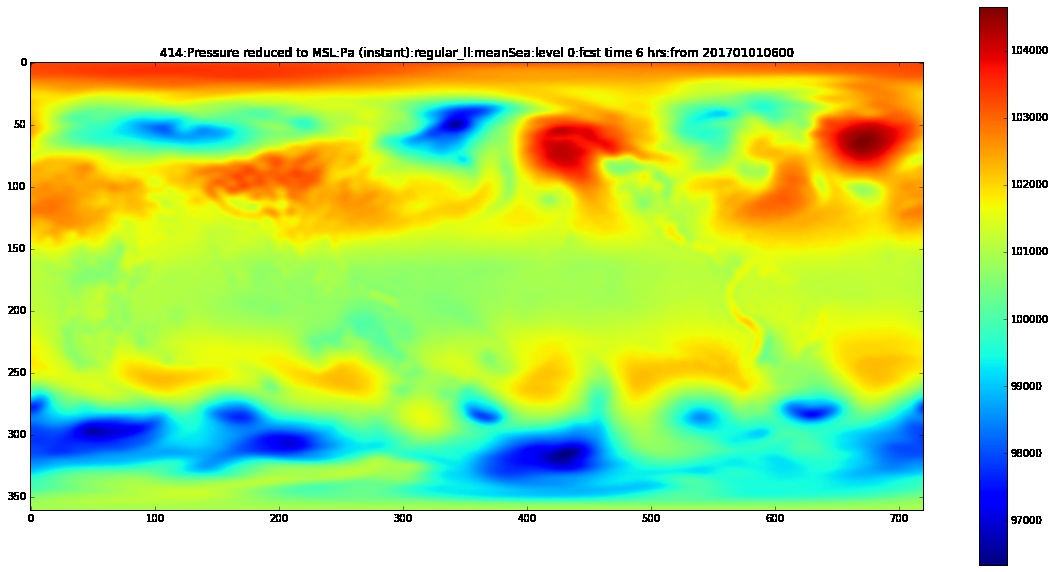

In [37]:
nr=94
plt.imshow(t2mens[nr,:,:])
plt.title(grb_n[nr])
plt.colorbar();

In [38]:
i=0
for grb in grbs[:]:
    print i,grb.level,grb.name,grb.values.shape,grb.values.min(), "-", grb.values.max(),grb.values.size
    i=i+1

0 0 U component of wind (361, 720) -27.4 - 29.3 259920
1 0 V component of wind (361, 720) -28.5 - 38.0 259920
2 0 unknown (361, 720) 0.0 - 102000.0 259920
3 0 Wind speed (gust) (361, 720) 0.0 - 33.1 259920
4 1 Geopotential Height (361, 720) 42083.6 - 50151.0 259920
5 1 Temperature (361, 720) 233.4 - 283.5 259920
6 1 Relative humidity (361, 720) 0.0003 - 0.0111 259920
7 1 U component of wind (361, 720) -65.8 - 142.4 259920
8 1 V component of wind (361, 720) -54.4 - 55.4 259920
9 1 Ozone mixing ratio (361, 720) 2.5771e-06 - 6.2744e-06 259920
10 2 Geopotential Height (361, 720) 37455.5 - 44411.1 259920
11 2 Temperature (361, 720) 209.2 - 281.8 259920
12 2 Relative humidity (361, 720) 0.0 - 0.58 259920
13 2 U component of wind (361, 720) -62.0 - 128.2 259920
14 2 V component of wind (361, 720) -39.1 - 55.5 259920
15 2 Ozone mixing ratio (361, 720) 3.8527e-06 - 9.7801e-06 259920
16 3 Geopotential Height (361, 720) 34923.3 - 41117.2 259920
17 3 Temperature (361, 720) 195.9 - 273.8 259920
18 